In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%run util.py
pwd = os.getcwd()

In [2]:
# mpich-devel-ofi-gcc-8.3.0 fails due to OFI error, 
# and hence isn't plotted.

key_dag = {1:'x5jirha',
           2:'m2lvcpo',
           3:'dh5i74e',
           4:'7q37r7h',
           5:'2momcvv',
           6:'7x34z32'}
           #7:'dr24ede'}

dag_soft = {'x5jirha':'openmpi-1.10.5-gcc-6.4.0',
            'm2lvcpo':'mpich-devel-ucx-gcc-8.3.0',
            'dh5i74e':'openmpi-4.0.2-verbs-gcc-8.3.0',
            '7q37r7h':'mpich-3.3.2-ucx-gcc-8.3.0',
            '2momcvv':'openmpi-4.0.2-ucx-gcc-8.3.0',
            '7x34z32':'mvapich-2.3.2-gcc-8.3.0'}
            #'dr24ede':'mpich-devel-ofi-gcc-8.3.0'

col_dict = {1:'r',2:'b',3:'g',4:'c',5:'m',6:'y',7:'k'}

osu_ver = 'v5.6.1'
trials  = 20

In [3]:
bw_mean     = np.zeros((23,len(dag_soft)))
bw_std      = np.zeros((23,len(dag_soft)))
lt_mean     = np.zeros((23,len(dag_soft)))
lt_std      = np.zeros((23,len(dag_soft)))

In [4]:
for i in np.arange(1,len(dag_soft)+1):
    loc = '/mnt/c/Users/sajid/Documents/misc/nu-quest-bench/mpi/new/'+key_dag[i]
    BW = get_BW_dset(loc,osu_ver,trials)
    bw_mean[:,i-1] = np.mean(BW,axis=1)
    bw_std[:,i-1]  = np.std(BW,axis=1)
    
    LT = get_LT_dset(loc,osu_ver,trials)
    lt_mean[:,i-1] = np.mean(LT,axis=1)
    lt_std[:,i-1]  = np.std(LT,axis=1)

os.chdir(pwd)

In [5]:
!mv *.png plots/

In [6]:
bw_min = np.zeros(23)
bw_max = np.zeros(23)
lt_min = np.zeros(23)
lt_max = np.zeros(23)

In [7]:
for i in range(23):
    _min = []
    _max = []
    for j in range(1,len(key_dag)+1):
        _min.append(np.min(bw_mean[i,j-1]))
        _max.append(np.max(bw_mean[i,j-1]))
    bw_min[i] = min(_min)
    bw_max[i] = max(_max)
    
for i in range(23):
    _min = []
    _max = []
    for j in range(1,len(key_dag)+1):
        _min.append(np.min(lt_mean[i,j-1]))
        _max.append(np.max(lt_mean[i,j-1]))
    lt_min[i] = min(_min)
    lt_max[i] = max(_max)

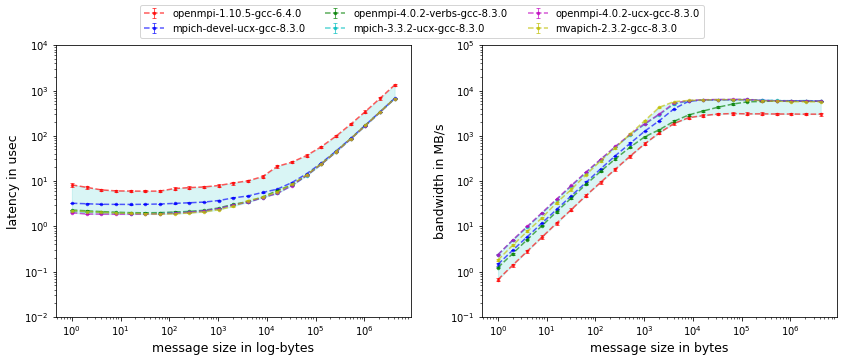

In [13]:
plt.rcParams["figure.figsize"] = (14,5)
f,(ax1,ax2) = plt.subplots(1,2)

for i in range(1,len(dag_soft)+1):
    _x = bw_key
    ax1.errorbar(_x, lt_mean[:,i-1],lt_std[:,i-1],
                 c=col_dict[i], 
                 fmt='--o',markersize=2.5,elinewidth=1,capsize=2,alpha=0.65)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_ylim((10**-2,10**4))
    ax1.set_xlabel('message size in log-bytes',size=12.5);
    ax1.set_ylabel('latency in usec',size=12.5);

    _x = lt_key
    ax2.errorbar(_x, bw_mean[:,i-1],bw_std[:,i-1],
                 c=col_dict[i], label=dag_soft[key_dag[i]],
                 fmt='--o',markersize=2.5,elinewidth=1,capsize=2,alpha=0.65)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    ax2.set_ylim((10**-1,10**5))
    ax2.set_xlabel('message size in bytes',size=12.5);
    ax2.set_ylabel('bandwidth in MB/s',size=12.5);

ax1.fill_between(_x, lt_min, lt_max, alpha=0.15, color = 'c')
ax2.fill_between(_x, bw_min, bw_max, alpha=0.15, color = 'c')


handles, labels = ax2.get_legend_handles_labels()  
f.legend(loc='upper center', fontsize='medium',ncol=3)
plt.savefig("new_mpi.png",dpi=100)

In [ ]:
!mv *.png plots/